In [2]:
from glob import glob
from pandas import read_csv, concat, cut, crosstab,DataFrame
from numpy import round, clip, trace, tril, infty

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#seleção das colunas de interesse 
colunas_cursos =['NU_ANO_CENSO','SG_UF','QT_ING','QT_CONC','TP_ORGANIZACAO_ACADEMICA','TP_CATEGORIA_ADMINISTRATIVA'
                 ,'CO_IES','NO_CINE_ROTULO','TP_MODALIDADE_ENSINO'
]
#inportação dos arquivos 
arquivos_cursos = glob(r'C:\Users\gabri\OneDrive\Documentos\dados_av2_tdadd\cursos\*csv')
arquivos_cursos.sort()
print('\n\nARQUIVOS CURSOS \n\n', arquivos_cursos)



ARQUIVOS CURSOS 

 ['C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2009.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2010.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2011.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2012.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2013.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2014.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2015.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2016.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2017.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2018.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\cursos\\CURSOS_2019.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tda

In [5]:
#modelagem dos arquivos 
curso = lambda x:(read_csv(x,encoding='ISO-8859-1',sep=';', usecols=colunas_cursos,low_memory=False)
                     .rename(columns = {'NU_ANO_CENSO':'ANO'})
                     .query('TP_ORGANIZACAO_ACADEMICA==1 & TP_CATEGORIA_ADMINISTRATIVA==1' )
                     
                     )
df_cursos = concat((curso(f) for f in arquivos_cursos)).dropna(subset=['SG_UF'])
df_cursos

,ANO,SG_UF,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,CO_IES,NO_CINE_ROTULO,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC
1,2009,MT,1,1,1,Ciências naturais formação de professor,2,38.0,0.0
2,2009,MT,1,1,1,Administração pública,2,72.0,0.0
3,2009,MT,1,1,1,Geografia formação de professor,1,46.0,0.0
4,2009,MT,1,1,1,Letras português formação de professor,1,47.0,23.0
5,2009,MT,1,1,1,Jornalismo,1,46.0,0.0
...,...,...,...,...,...,...,...,...,...
443117,2021,SC,1,1,585,Letras português formação de professor,2,0.0,3.0
443224,2021,SC,1,1,585,Biologia formação de professor,2,0.0,10.0
443225,2021,SC,1,1,585,Física formação de professor,2,0.0,1.0
443226,2021,SC,1,1,585,Matemática formação de professor,2,1.0,0.0


Como foi feita as escolha do curso para estudo
primeiro colocamos uma restrição para cursos da ufpb(579) e que sao dados nas duas modalidade
Os únicos dois cursos que não são de formação para professor foram escolhidos para a análise.

In [6]:
df_cursos.query('CO_IES==579 & TP_MODALIDADE_ENSINO==2').drop_duplicates('NO_CINE_ROTULO')

,ANO,SG_UF,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,CO_IES,NO_CINE_ROTULO,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC
23711,2009,CE,1,1,579,Ciências agrárias formação de professor,2,40.0,0.0
23712,2009,CE,1,1,579,Letras português formação de professor,2,0.0,0.0
23713,2009,PB,1,1,579,Pedagogia,2,24.0,0.0
23714,2009,PB,1,1,579,Biologia formação de professor,2,30.0,0.0
23716,2009,PB,1,1,579,Ciências naturais formação de professor,2,0.0,0.0
23717,2009,PB,1,1,579,Matemática formação de professor,2,30.0,0.0
24838,2010,PB,1,1,579,Letras português língua brasileira de sinais f...,2,14.0,0.0
31875,2013,RN,1,1,579,Computação formação de professor,2,45.0,0.0
32082,2013,PB,1,1,579,Administração pública,2,45.0,0.0
34989,2014,PB,1,1,579,Letras espanhol formação de professor,2,22.0,0.0


Testando dos únicos dois curso que não são para formação de professor se enquadra em dado nas duas modalidade
chegamos a conclusão que o único curso ofertado 100% ead e 100% presencial é pedagogia.

In [7]:
teste=df_cursos.query('NO_CINE_ROTULO==["Pedagogia","Administração pública"] ')
teste.query('CO_IES==579 & TP_MODALIDADE_ENSINO==1').drop_duplicates('NO_CINE_ROTULO')

,ANO,SG_UF,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,CO_IES,NO_CINE_ROTULO,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC
23724,2009,PB,1,1,579,Pedagogia,1,75.0,0.0


In [8]:
#filtragem do curso escolhido
df_cursos=df_cursos.query('NO_CINE_ROTULO=="Pedagogia" ')
df_cursos

,ANO,SG_UF,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,CO_IES,NO_CINE_ROTULO,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC
10,2009,MT,1,1,1,Pedagogia,2,0.0,15.0
11,2009,MT,1,1,1,Pedagogia,1,90.0,63.0
12,2009,MT,1,1,1,Pedagogia,2,0.0,0.0
56,2009,MT,1,1,1,Pedagogia,2,0.0,64.0
61,2009,MT,1,1,1,Pedagogia,2,48.0,0.0
...,...,...,...,...,...,...,...,...,...
416220,2021,RS,1,1,582,Pedagogia,2,0.0,7.0
417078,2021,RS,1,1,582,Pedagogia,2,0.0,24.0
417295,2021,RS,1,1,582,Pedagogia,2,0.0,18.0
425194,2021,SC,1,1,15121,Pedagogia,1,115.0,39.0


# Dados ies ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


In [9]:
#colunas selecionada 
colunas_ies = ['CO_IES', 'SG_IES', 'NO_REGIAO_IES','SG_UF_IES','TP_CATEGORIA_ADMINISTRATIVA']

#importaçao dos arquivos 
arquivos_ies = glob(r"C:\Users\gabri\OneDrive\Documentos\dados_av2_tdadd\ies\*csv")
arquivos_ies.sort()
print('ARQUIVOS  IES \n\n', arquivos_ies)

ARQUIVOS  IES 

 ['C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2009.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2010.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2011.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2012.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2013.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2014.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2015.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2016.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2017.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2018.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2019.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados_av2_tdadd\\ies\\IES_2020.CSV', 'C:\\Users\\gabri\\OneDrive\\Documentos\\dados

In [10]:
# modelagem dos arquivos 
ies = lambda x: (read_csv(x,encoding='ISO-8859-1',sep=';',usecols=colunas_ies,low_memory=False)
.query('TP_CATEGORIA_ADMINISTRATIVA==1')
)
df_ies = concat((ies(f) for f in arquivos_ies)).drop_duplicates(subset=['CO_IES'])
df_ies=df_ies.filter(items=['NO_REGIAO_IES','SG_UF_IES','CO_IES','SG_IES'])
df_ies

,NO_REGIAO_IES,SG_UF_IES,CO_IES,SG_IES
0,Centro-Oeste,MT,1,UFMT
1,Centro-Oeste,DF,2,UNB
2,Nordeste,SE,3,UFS
3,Norte,AM,4,UFAM
4,Nordeste,PI,5,UFPI
...,...,...,...,...
2452,Centro-Oeste,GO,25274,UFCAT
2453,Nordeste,PE,25275,UFAPE
2454,Nordeste,PI,25277,UFDPAR
2455,Centro-Oeste,GO,25282,UFJ


# Tabela geral :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


In [11]:
df_cursos_geral=df_cursos.groupby(['ANO', 'CO_IES','TP_MODALIDADE_ENSINO'])\
    .agg(QT_ING = ('QT_ING', 'sum'), QT_CONC =('QT_CONC', 'sum'))\
        .reset_index()
df_cursos_geral

,ANO,CO_IES,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC
0,2009,1,1,150.0,91.0
1,2009,1,2,113.0,96.0
2,2009,2,1,263.0,178.0
3,2009,2,2,200.0,789.0
4,2009,3,1,159.0,81.0
...,...,...,...,...,...
997,2021,25274,1,57.0,34.0
998,2021,25275,1,82.0,30.0
999,2021,25277,1,36.0,30.0
1000,2021,25282,1,76.0,25.0


In [56]:
back=lambda x: x.shift(5)
df_geral= (
df_cursos_geral.sort_values(['CO_IES', 'ANO'])#ordena por ano e co_ies 
.assign(QT_ING_back = lambda x: x.groupby(['CO_IES']).QT_ING.transform(back),#cria uma coluna com os ingressantes de 4 anos antes 
EVASAO = lambda x:round(clip((1-(x.QT_CONC/x.QT_ING_back))*100,0,100),2)) # calculando a evasao 
.dropna(subset=['QT_ING_back','EVASAO'])#retirando os nan das duas colunas 
.merge(df_ies, on='CO_IES', how='inner')#juntando os dados dos cursos com os dados do ies 
)
df_geral

,ANO,CO_IES,TP_MODALIDADE_ENSINO,QT_ING,QT_CONC,QT_ING_back,EVASAO,NO_REGIAO_IES,SG_UF_IES,SG_IES
0,2011,1,2,0.0,30.0,150.0,80.00,Centro-Oeste,MT,UFMT
1,2012,1,1,206.0,114.0,113.0,0.00,Centro-Oeste,MT,UFMT
2,2012,1,2,206.0,117.0,172.0,31.98,Centro-Oeste,MT,UFMT
3,2013,1,1,128.0,76.0,0.0,0.00,Centro-Oeste,MT,UFMT
4,2013,1,2,0.0,13.0,145.0,91.03,Centro-Oeste,MT,UFMT
...,...,...,...,...,...,...,...,...,...,...
714,2021,15497,1,11.0,51.0,31.0,0.00,Nordeste,CE,UNILAB
715,2018,18440,1,59.0,32.0,37.0,13.51,Norte,PA,UNIFESSPA
716,2019,18440,1,188.0,21.0,38.0,44.74,Norte,PA,UNIFESSPA
717,2020,18440,1,42.0,31.0,44.0,29.55,Norte,PA,UNIFESSPA


In [13]:
#transformando o tipo da coluna 
df_geral.to_excel('geral_tab1.xlsx',sheet_name='geral2',index=False)

In [69]:
df_geral=df_geral.query('ANO>2014') 

# EVASAO  ))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))


In [70]:
#evasao por ano geral
ev_ano= df_geral.groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,8558.0,14539.0,3315.55
2016,9565.0,13154.0,3064.46
2017,7692.0,14976.0,3691.48
2018,8755.0,11659.0,2732.75
2019,6826.0,12039.0,3649.28
2020,4604.0,13510.0,4568.94
2021,5828.0,11474.0,3583.14


In [71]:
#evasao por ano geral
print(ev_ano.sum())

QT_CONC        51828.0
QT_ING_back    91351.0
Evasão         24605.6
dtype: float64


Text(0.5, 1.0, 'Evasão por ano da geral')

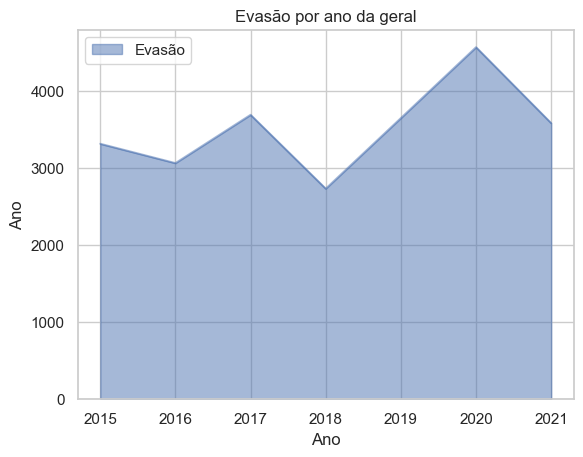

In [72]:
#gráfico de area 
ev_ano_tb=ev_ano.reset_index()
ev_ano_tb.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("Ano")
plt.ylabel("Ano")
plt.title("Evasão por ano da geral")

In [73]:
#evsao por ano geral presencial
ev_ano_1= df_geral.query('TP_MODALIDADE_ENSINO==1').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano_1

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,6104.0,9894.0,1997.68
2016,7187.0,7813.0,1515.23
2017,6293.0,9304.0,1778.92
2018,6798.0,5782.0,954.19
2019,5929.0,6739.0,1353.77
2020,3559.0,8194.0,2351.03
2021,3537.0,6293.0,2024.11


Text(0.5, 1.0, 'Evasão por ano presencial geral')

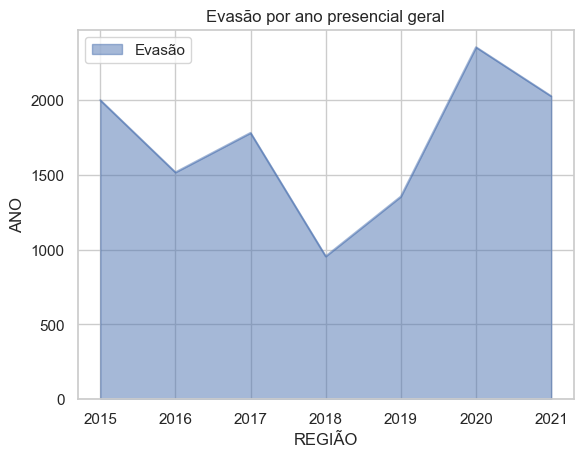

In [74]:
#grafico de area 
ev_ano_tb1=ev_ano_1.reset_index()
ev_ano_tb1.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("REGIÃO")
plt.ylabel("ANO")
plt.title("Evasão por ano presencial geral")

In [75]:
#evasao por ano geral ead
ev_ano_2= df_geral.query('TP_MODALIDADE_ENSINO==2').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano_2

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,2454.0,4645.0,1317.87
2016,2378.0,5341.0,1549.23
2017,1399.0,5672.0,1912.56
2018,1957.0,5877.0,1778.56
2019,897.0,5300.0,2295.51
2020,1045.0,5316.0,2217.91
2021,2291.0,5181.0,1559.03


Text(0.5, 1.0, 'Evasão por ano EAD geral')

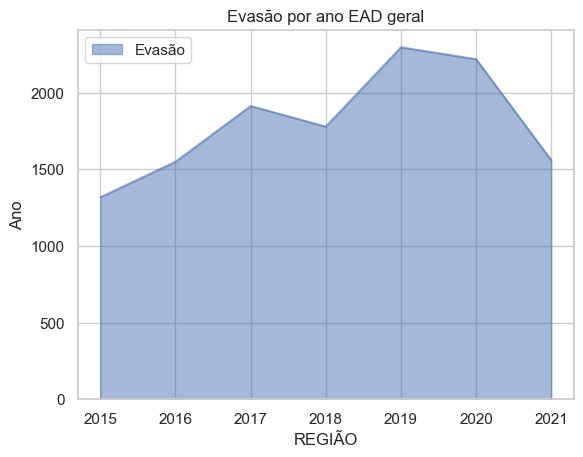

In [76]:
#gráfico de area 
ev_ano_tb2=ev_ano_2.reset_index()
ev_ano_tb2.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("REGIÃO")
plt.ylabel("Ano")
plt.title("Evasão por ano EAD geral")

In [77]:
#evasão por ano nordeste presencial
ev_ano_3= df_geral.query('TP_MODALIDADE_ENSINO==1 & NO_REGIAO_IES=="Nordeste"').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano+3

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,8561.0,14542.0,3318.55
2016,9568.0,13157.0,3067.46
2017,7695.0,14979.0,3694.48
2018,8758.0,11662.0,2735.75
2019,6829.0,12042.0,3652.28
2020,4607.0,13513.0,4571.94
2021,5831.0,11477.0,3586.14


Text(0.5, 1.0, 'Evasão por ano do nordeste presencial')

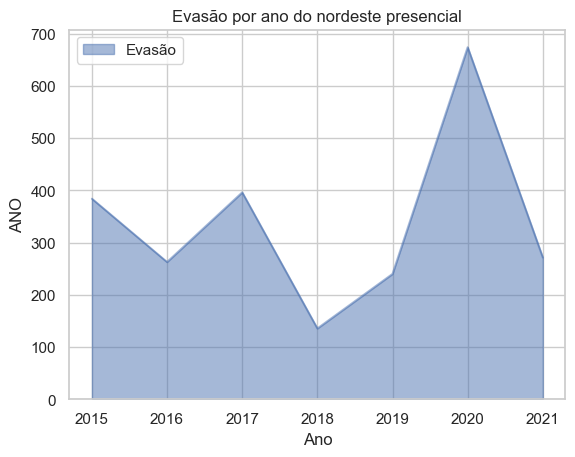

In [88]:
#gráfico de area 
ev_ano_tb3=ev_ano_3.reset_index()
ev_ano_tb3.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("Ano")
plt.ylabel("ANO")
plt.title("Evasão por ano do nordeste presencial")

In [89]:
#evasão por ano nordeste ead
ev_ano_4= df_geral.query('TP_MODALIDADE_ENSINO==2 & NO_REGIAO_IES=="Nordeste"').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano_4


,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,606.0,2063.0,456.27
2016,792.0,2195.0,495.98
2017,306.0,2612.0,701.00
2018,633.0,2959.0,644.74
2019,207.0,2344.0,822.84
2020,602.0,2687.0,663.49
2021,508.0,2408.0,671.71


Text(0.5, 1.0, 'Evasão por ano do nordeste EAD')

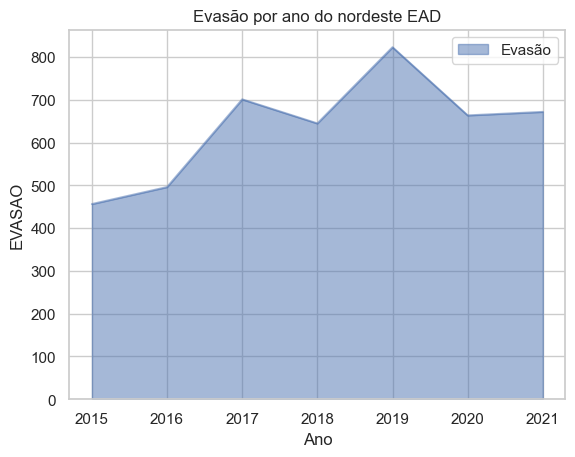

In [90]:
#grafico de area 
ev_ano_tb4=ev_ano_4.reset_index()
ev_ano_tb4.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("Ano")
plt.ylabel("EVASAO")
plt.title("Evasão por ano do nordeste EAD")

In [91]:
#evasao por ano UFPB PRESENCIAL
ev_ano_UFPB_PR= df_geral.query('TP_MODALIDADE_ENSINO==1 & SG_IES=="UFPB"').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano_UFPB_PR

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,221.0,498.0,55.62
2016,309.0,344.0,10.17
2017,316.0,287.0,0.00
2018,285.0,76.0,0.00
2019,213.0,0.0,0.00
2020,58.0,280.0,79.29
2021,182.0,0.0,0.00


Text(0.5, 1.0, 'Evasão por ano da UFPB presencial')

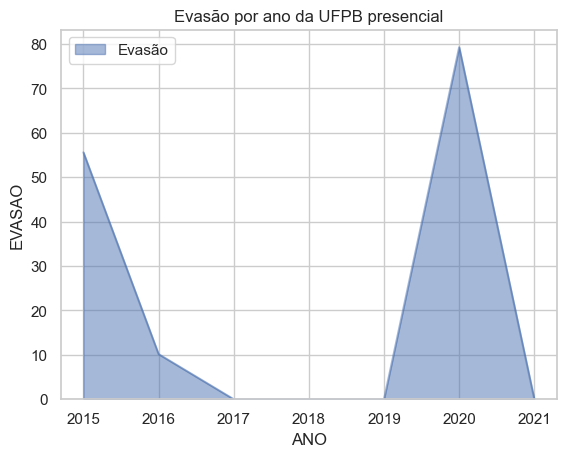

In [92]:
#grafico de area 
ev_ano_UFPB_PR1=ev_ano_UFPB_PR.reset_index()
ev_ano_UFPB_PR1.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("ANO")
plt.ylabel("EVASAO")
plt.title("Evasão por ano da UFPB presencial")

In [93]:
#evasao por ano ead
ev_ano_UFPB_ED= df_geral.query('TP_MODALIDADE_ENSINO==2 & SG_IES=="UFPB"').groupby(['ANO'])\
    .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_ano_UFPB_ED

,QT_CONC,QT_ING_back,Evasão
ANO,,,
2015,103.0,461.0,77.66
2016,142.0,435.0,67.36
2017,114.0,462.0,75.32
2018,112.0,459.0,75.60
2019,62.0,497.0,87.53
2020,31.0,439.0,92.94
2021,58.0,427.0,86.42


Text(0.5, 1.0, 'Evasão por ano da UFPB EAD')

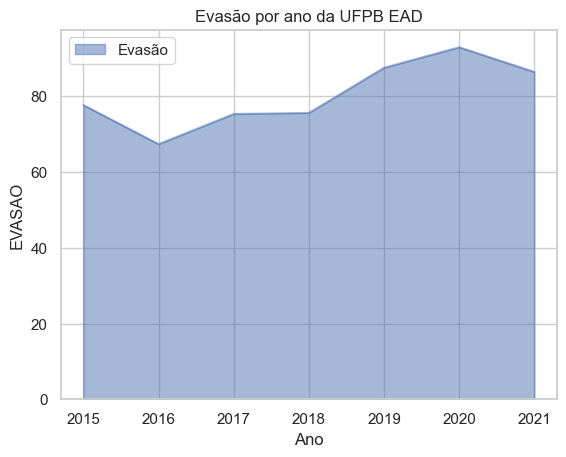

In [94]:
#grafico de area 
ev_ano_UFPB_ED1=ev_ano_UFPB_ED.reset_index()
ev_ano_UFPB_ED1.plot.area( x='ANO', y='Evasão',stacked=False) 
plt.xlabel("Ano")
plt.ylabel("EVASAO")
plt.title("Evasão por ano da UFPB EAD")

# evasao por ano e região

In [95]:
#como cada estado geral em cada ano
R= df_geral.groupby(['ANO','NO_REGIAO_IES'])\
 .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))

R

QT_CONC  QT_ING_back   Evasão
ANO  NO_REGIAO_IES                               
2015 Centro-Oeste     651.0       1384.0   483.46
     Nordeste        2514.0       4635.0   840.39
     Norte           2268.0       2098.0   321.24
     Sudeste         1881.0       4872.0  1139.20
     Sul             1244.0       1550.0   531.26
2016 Centro-Oeste     887.0       1438.0   346.18
     Nordeste        2687.0       3852.0   758.80
     Norte           3047.0       1783.0   198.80
     Sudeste         2267.0       4291.0  1006.12
     Sul              677.0       1790.0   754.56
2017 Centro-Oeste     654.0       1642.0   505.57
     Nordeste        2075.0       5150.0  1097.25
     Norte           2440.0       2450.0   197.92
     Sudeste         1601.0       4168.0  1328.90
     Sul              922.0       1566.0   561.84
2018 Centro-Oeste     796.0       1094.0   302.28
     Nordeste        2423.0       3975.0   780.31
     Norte           2868.0       3211.0   350.56
     Sudeste         2065.0       2205.0   604.04
     Sul              603.0       1174.0   695.56
2019 Centro-Oeste     720.0       1239.0   326.36
     Nordeste        1901.0       3248.0  1062.88
     Norte           2017.0       3083.0   393.72
     Sudeste         1410.0       3042.0  1215.17
     Sul              778.0       1427.0   651.15
2020 Centro-Oeste     439.0       1661.0   567.26
     Nordeste        1778.0       5635.0  1337.78
     Norte            883.0       1476.0   394.56
     Sudeste         1016.0       3112.0  1451.15
     Sul              488.0       1626.0   818.19
2021 Centro-Oeste     707.0       1168.0   377.42
     Nordeste        1730.0       3255.0   943.21
     Norte            684.0       1826.0   528.63
     Sudeste         1868.0       3316.0  1130.43
     Sul              839.0       1909.0   603.45

<AxesSubplot: xlabel='NO_REGIAO_IES'>

<Figure size 640x480 with 0 Axes>

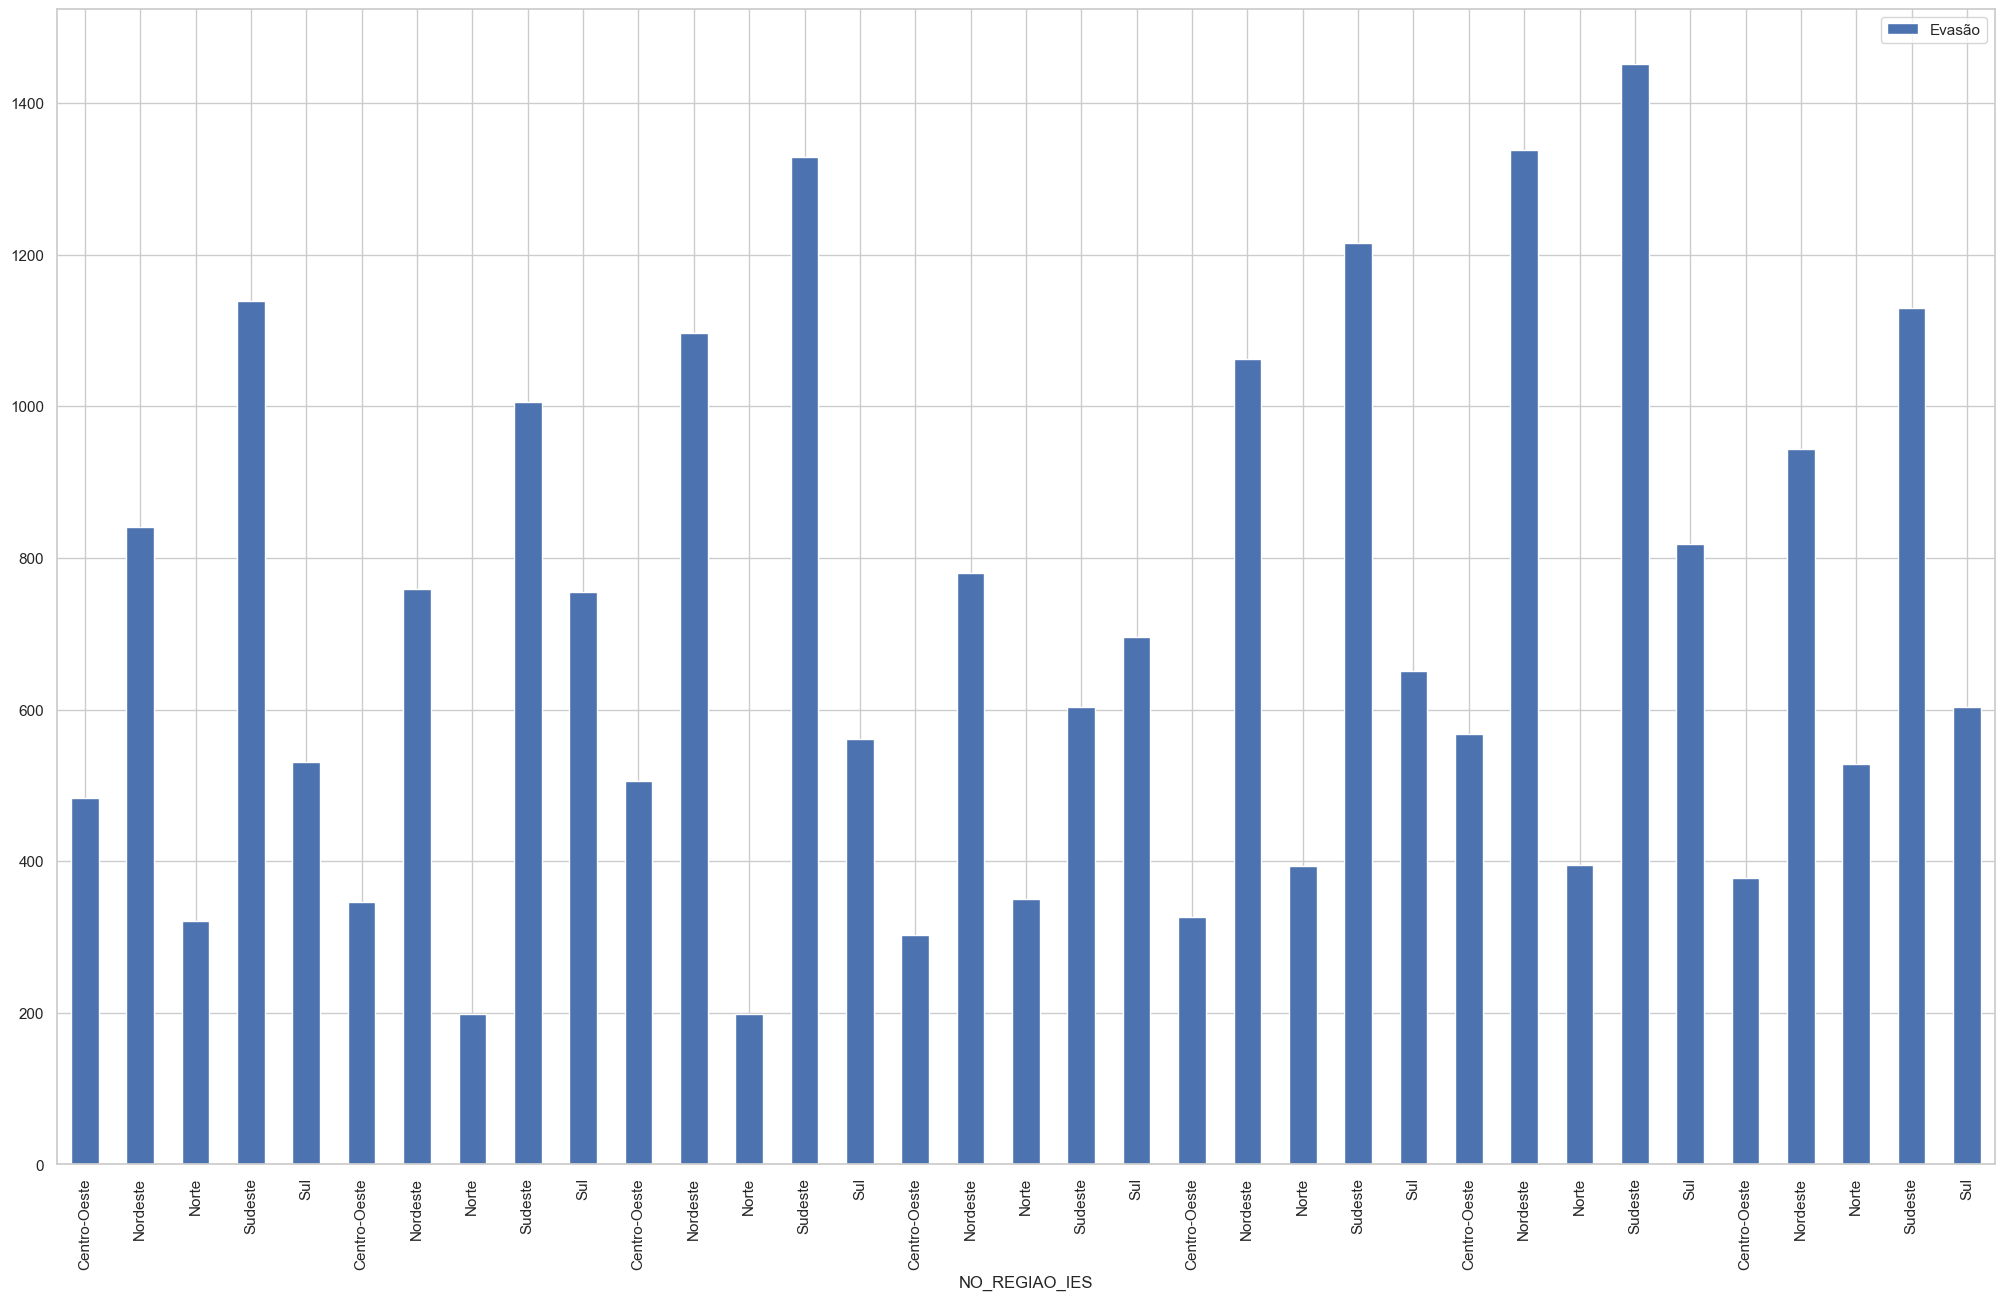

In [98]:
#grafico
R_tb=R.reset_index()
plt.figure()
R_tb.plot(kind='bar',x='NO_REGIAO_IES',y='Evasão',figsize=(25,15))


In [31]:
#como cada estado geral presencial em cada ano 
R2= df_geral.query('TP_MODALIDADE_ENSINO==1').groupby(['ANO','NO_REGIAO_IES'])\
 .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))

R2

QT_CONC  QT_ING_back  Evasão
ANO  NO_REGIAO_IES                              
2012 Centro-Oeste     397.0        313.0   26.00
     Nordeste         708.0        890.0  146.36
     Norte            161.0        147.0    0.00
     Sudeste          475.0       2397.0  495.90
     Sul              293.0        520.0  165.39
2013 Centro-Oeste     407.0         64.0   22.64
     Nordeste        1171.0       2553.0  324.27
     Norte            212.0        186.0    0.00
     Sudeste          667.0        960.0  287.84
     Sul              378.0       1121.0  243.96
2014 Centro-Oeste     587.0        434.0   68.61
     Nordeste        1911.0       1823.0  273.92
     Norte           1527.0       1793.0  144.17
     Sudeste         1143.0       2527.0  586.00
     Sul              460.0        740.0  261.60
2015 Centro-Oeste     559.0        614.0  160.02
     Nordeste        1908.0       2572.0  384.12
     Norte           2207.0       1840.0  244.88
     Sudeste          944.0       3970.0  870.78
     Sul              486.0        898.0  337.88
2016 Centro-Oeste     665.0        582.0  108.03
     Nordeste        1895.0       1657.0  262.82
     Norte           3045.0       1520.0   99.56
     Sudeste         1037.0       3027.0  708.82
     Sul              545.0       1027.0  336.00
2017 Centro-Oeste     540.0        776.0  167.29
     Nordeste        1769.0       2538.0  396.25
     Norte           2360.0       2205.0  130.57
     Sudeste         1075.0       3033.0  807.98
     Sul              549.0        752.0  276.83
2018 Centro-Oeste     610.0        315.0   46.32
     Nordeste        1790.0       1016.0  135.57
     Norte           2818.0       2904.0  266.85
     Sudeste         1019.0       1053.0  282.03
     Sul              561.0        494.0  223.42
2019 Centro-Oeste     629.0        287.0   41.96
     Nordeste        1694.0        904.0  240.04
     Norte           2011.0       2817.0  295.98
     Sudeste         1071.0       1925.0  477.01
     Sul              524.0        806.0  298.78
2020 Centro-Oeste     385.0        783.0  251.00
     Nordeste        1176.0       2948.0  674.29
     Norte            883.0       1476.0  394.56
     Sudeste          772.0       2004.0  618.70
     Sul              343.0        983.0  412.48
2021 Centro-Oeste     468.0        337.0  161.72
     Nordeste        1222.0        847.0  271.50
     Norte            684.0       1826.0  528.63
     Sudeste          809.0       2049.0  615.70
     Sul              354.0       1234.0  446.56

<AxesSubplot: xlabel='NO_REGIAO_IES'>

<Figure size 640x480 with 0 Axes>

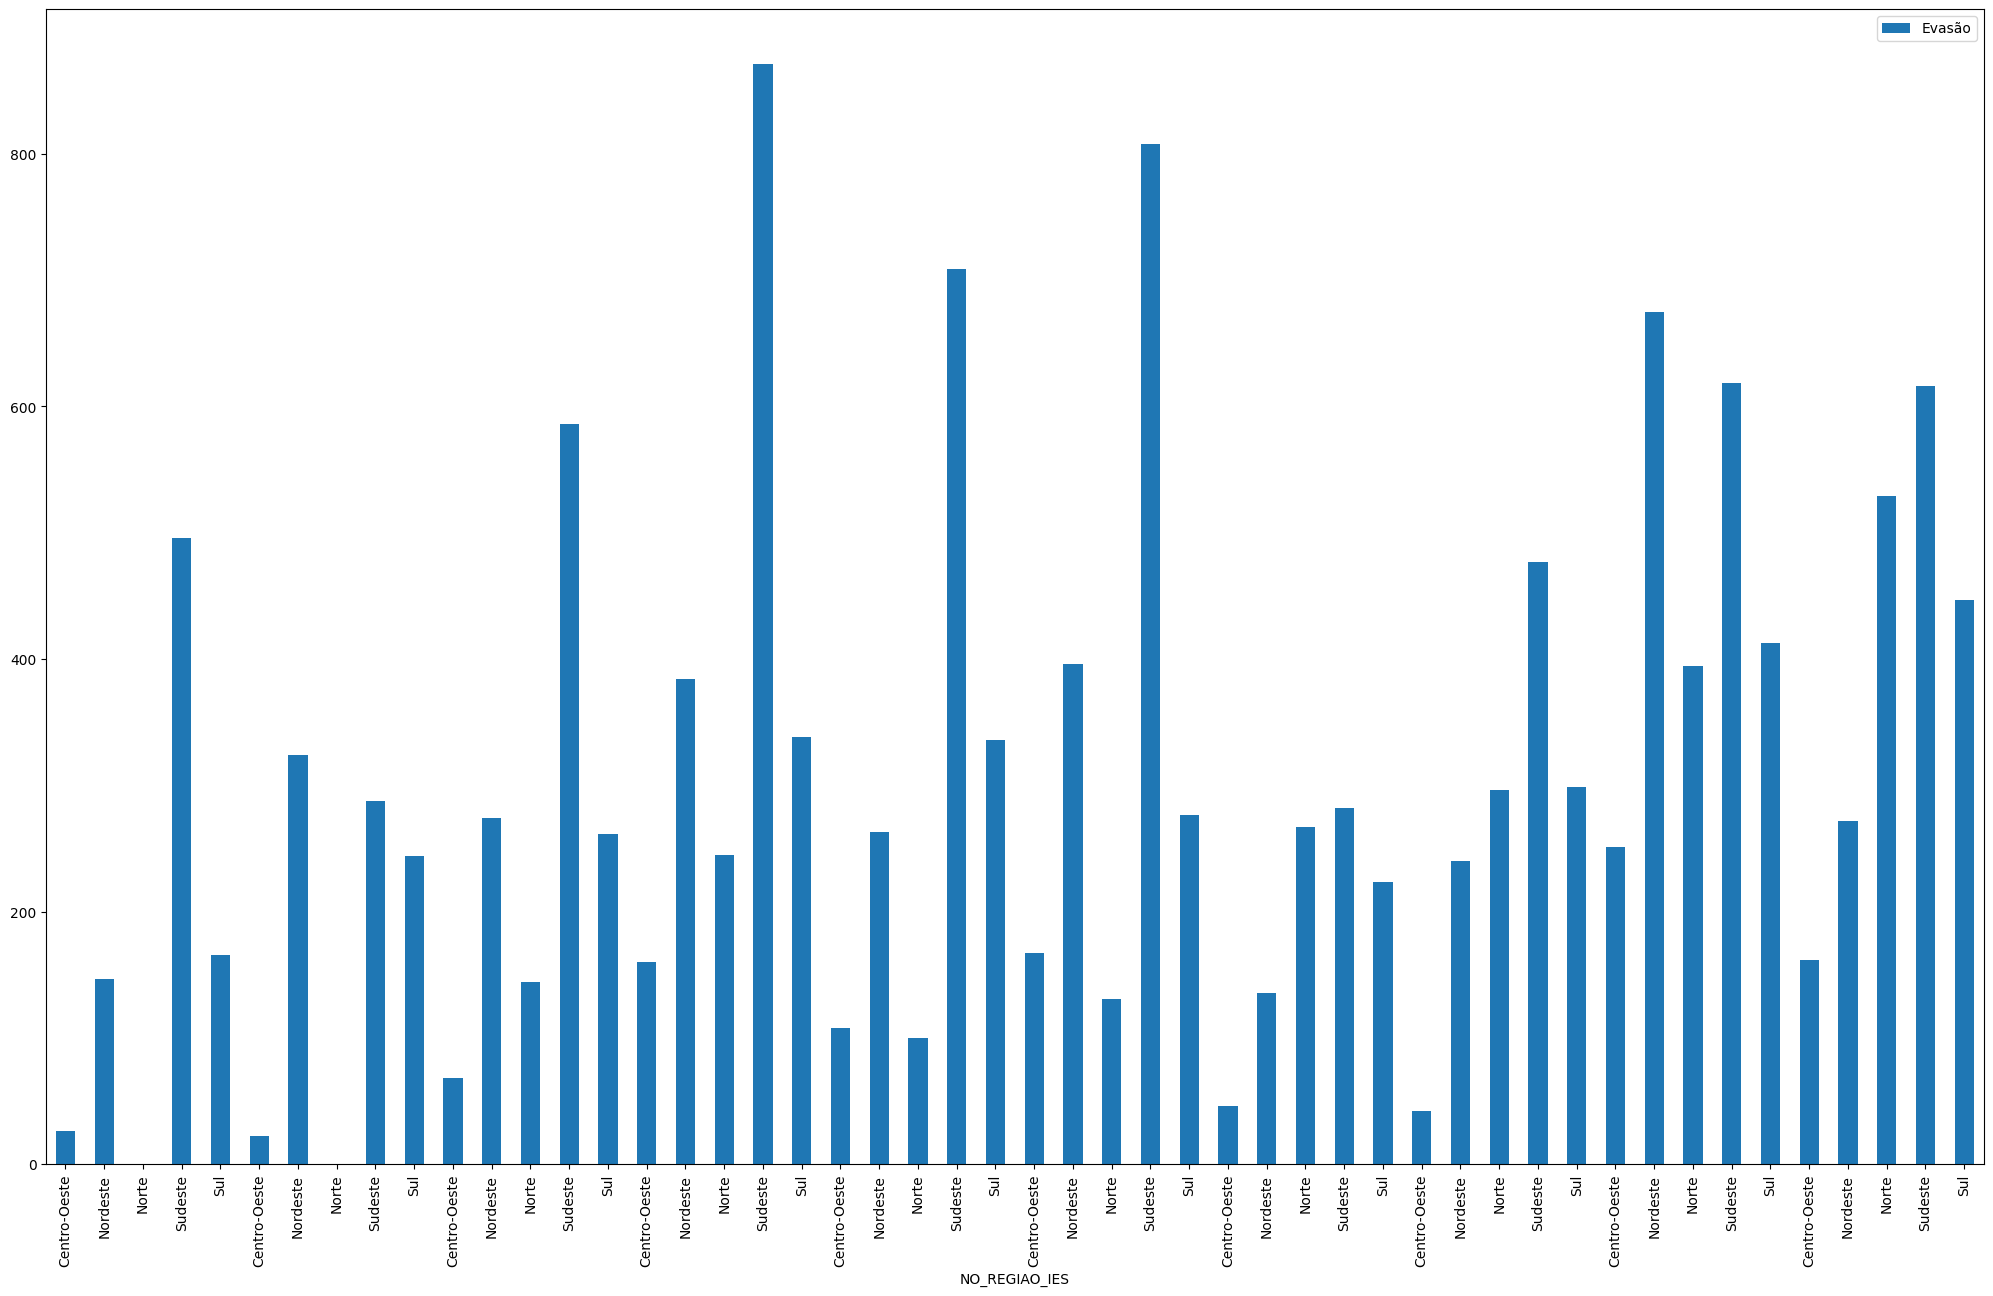

In [32]:
R_tb2=R2.reset_index()
plt.figure()
R_tb2.plot(kind='bar',x='NO_REGIAO_IES',y='Evasão',figsize=(25,15))

In [33]:
#como cada REGIÃO geral ead
R3= df_geral.query('TP_MODALIDADE_ENSINO==2').groupby(['ANO','NO_REGIAO_IES'])\
 .agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))

R3

QT_CONC  QT_ING_back  Evasão
ANO  NO_REGIAO_IES                              
2011 Centro-Oeste      50.0        615.0  270.10
     Nordeste         205.0       1076.0  251.53
     Norte              0.0        349.0  100.00
     Sudeste         1177.0        784.0  150.65
     Sul              265.0        680.0  317.13
2012 Centro-Oeste     391.0        661.0  131.62
     Nordeste         196.0       2088.0  554.10
     Norte              0.0        356.0  100.00
     Sudeste          717.0        912.0  418.28
     Sul              482.0        530.0  142.77
2013 Centro-Oeste     102.0        721.0  356.38
     Nordeste         254.0       2189.0  648.15
     Norte              0.0        317.0  100.00
     Sudeste          579.0        953.0  510.87
     Sul              220.0        519.0  260.16
2014 Centro-Oeste     233.0        752.0  292.57
     Nordeste         532.0       2167.0  538.05
     Norte              0.0        240.0  100.00
     Sudeste          677.0        962.0  422.67
     Sul              380.0        739.0  330.45
2015 Centro-Oeste      92.0        770.0  323.44
     Nordeste         606.0       2063.0  456.27
     Norte             61.0        258.0   76.36
     Sudeste          937.0        902.0  268.42
     Sul              758.0        652.0  193.38
2016 Centro-Oeste     222.0        856.0  238.15
     Nordeste         792.0       2195.0  495.98
     Norte              2.0        263.0   99.24
     Sudeste         1230.0       1264.0  297.30
     Sul              132.0        763.0  418.56
2017 Centro-Oeste     114.0        866.0  338.28
     Nordeste         306.0       2612.0  701.00
     Norte             80.0        245.0   67.35
     Sudeste          526.0       1135.0  520.92
     Sul              373.0        814.0  285.01
2018 Centro-Oeste     186.0        779.0  255.96
     Nordeste         633.0       2959.0  644.74
     Norte             50.0        307.0   83.71
     Sudeste         1046.0       1152.0  322.01
     Sul               42.0        680.0  472.14
2019 Centro-Oeste      91.0        952.0  284.40
     Nordeste         207.0       2344.0  822.84
     Norte              6.0        266.0   97.74
     Sudeste          339.0       1117.0  738.16
     Sul              254.0        621.0  352.37
2020 Centro-Oeste      54.0        878.0  316.26
     Nordeste         602.0       2687.0  663.49
     Sudeste          244.0       1108.0  832.45
     Sul              145.0        643.0  405.71
2021 Centro-Oeste     239.0        831.0  215.70
     Nordeste         508.0       2408.0  671.71
     Sudeste         1059.0       1267.0  514.73
     Sul              485.0        675.0  156.89

<AxesSubplot: xlabel='NO_REGIAO_IES'>

<Figure size 640x480 with 0 Axes>

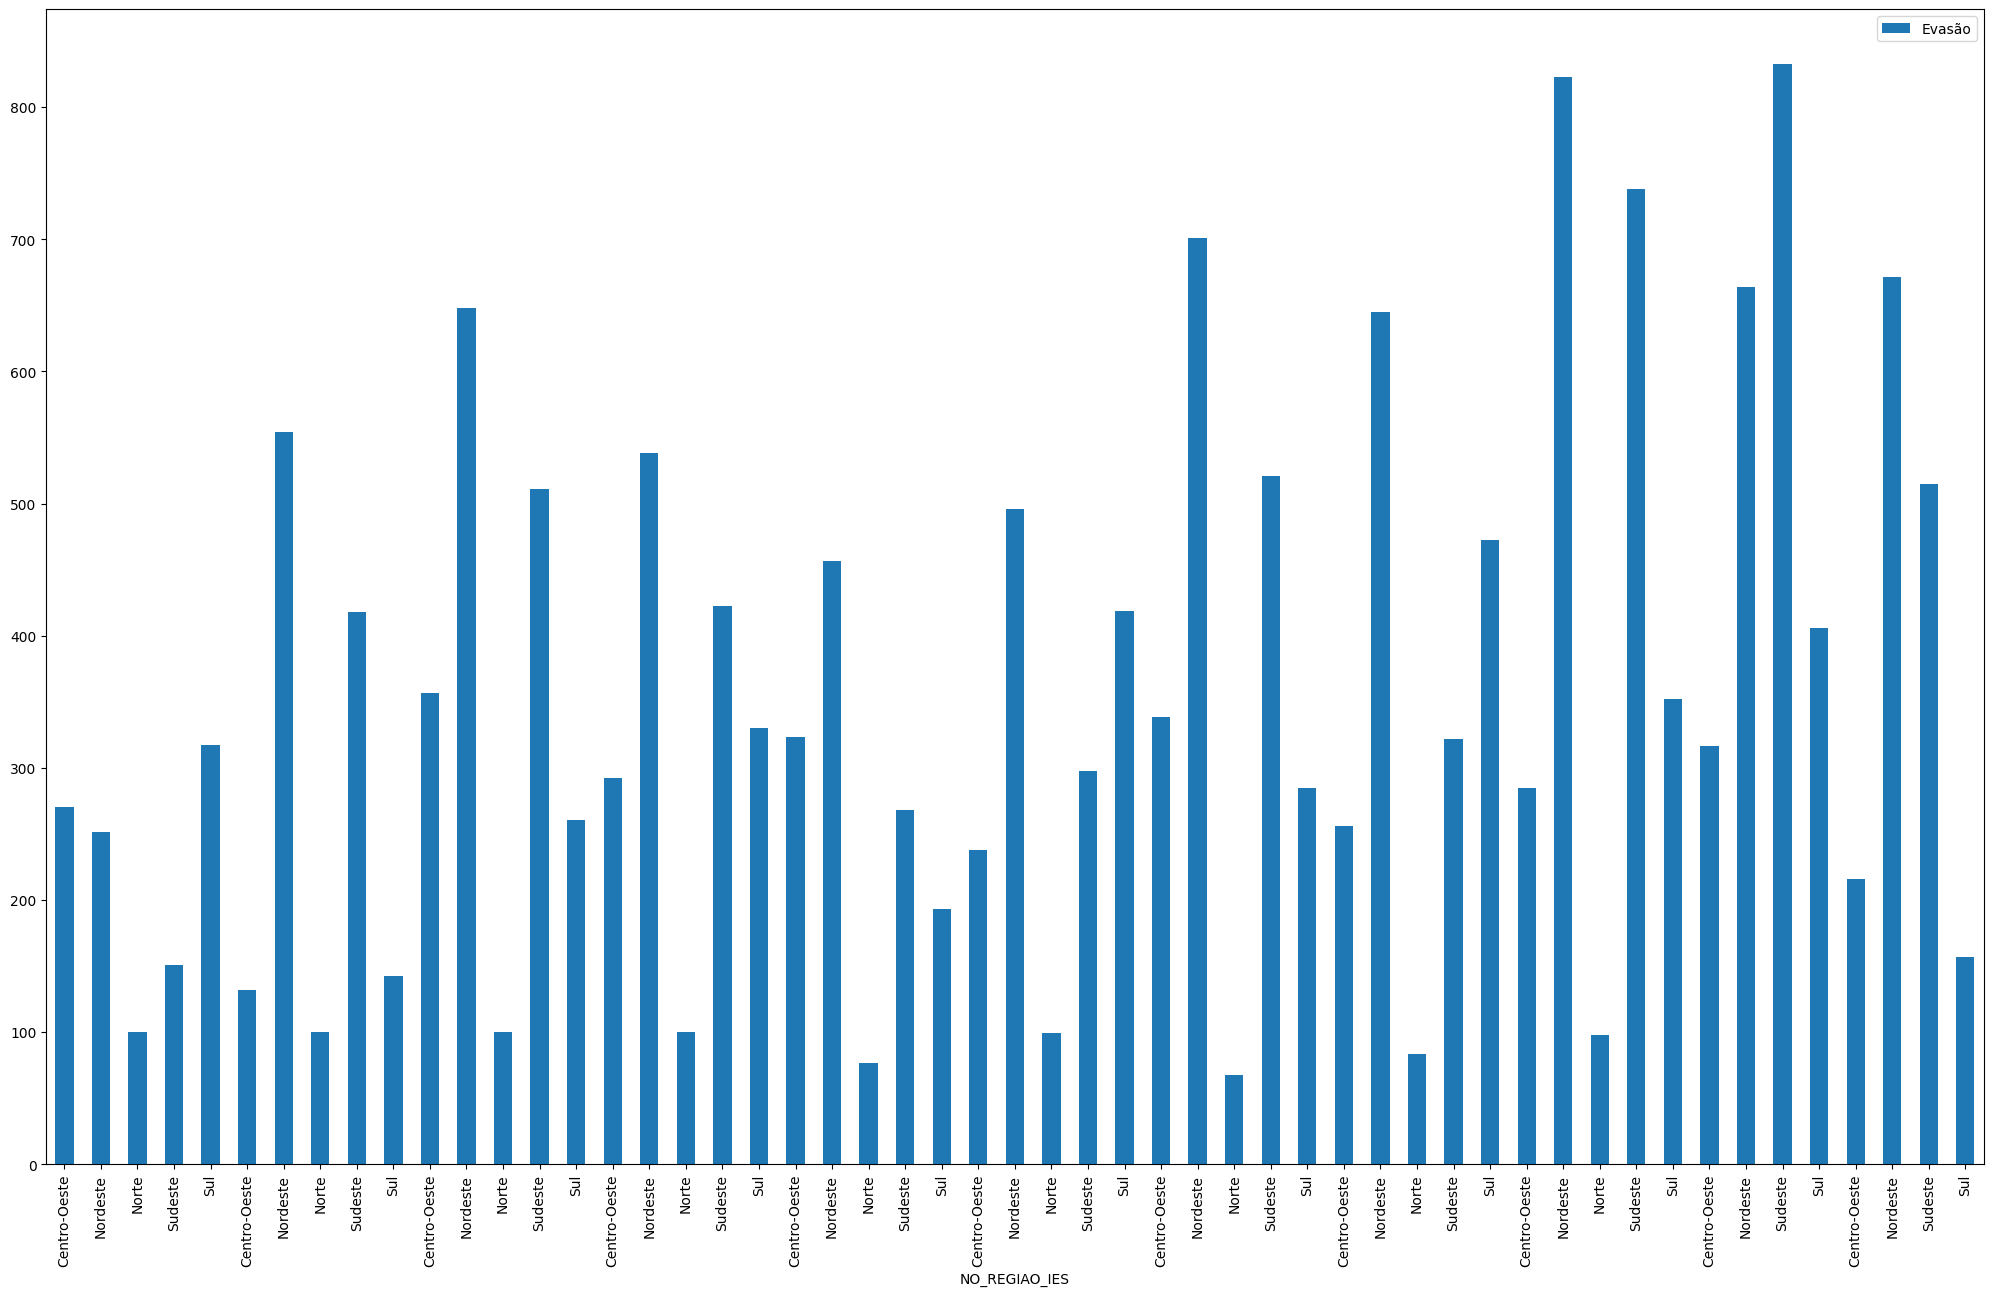

In [34]:
#GRAFICO R3
R_tb3=R3.reset_index()
plt.figure()
R_tb3.plot(kind='bar',x='NO_REGIAO_IES',y='Evasão',figsize=(25,15))

In [35]:
#como a região nordeste se saiu presencial 
R4= df_geral.query('NO_REGIAO_IES=="Nordeste" & TP_MODALIDADE_ENSINO==1').groupby(['ANO','NO_REGIAO_IES']).\
    agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))

R4

,,QT_CONC,QT_ING_back,Evasão
ANO,NO_REGIAO_IES,,,
2012,Nordeste,708.0,890.0,146.36
2013,Nordeste,1171.0,2553.0,324.27
2014,Nordeste,1911.0,1823.0,273.92
2015,Nordeste,1908.0,2572.0,384.12
2016,Nordeste,1895.0,1657.0,262.82
2017,Nordeste,1769.0,2538.0,396.25
2018,Nordeste,1790.0,1016.0,135.57
2019,Nordeste,1694.0,904.0,240.04
2020,Nordeste,1176.0,2948.0,674.29


<AxesSubplot: xlabel='ANO'>

<Figure size 640x480 with 0 Axes>

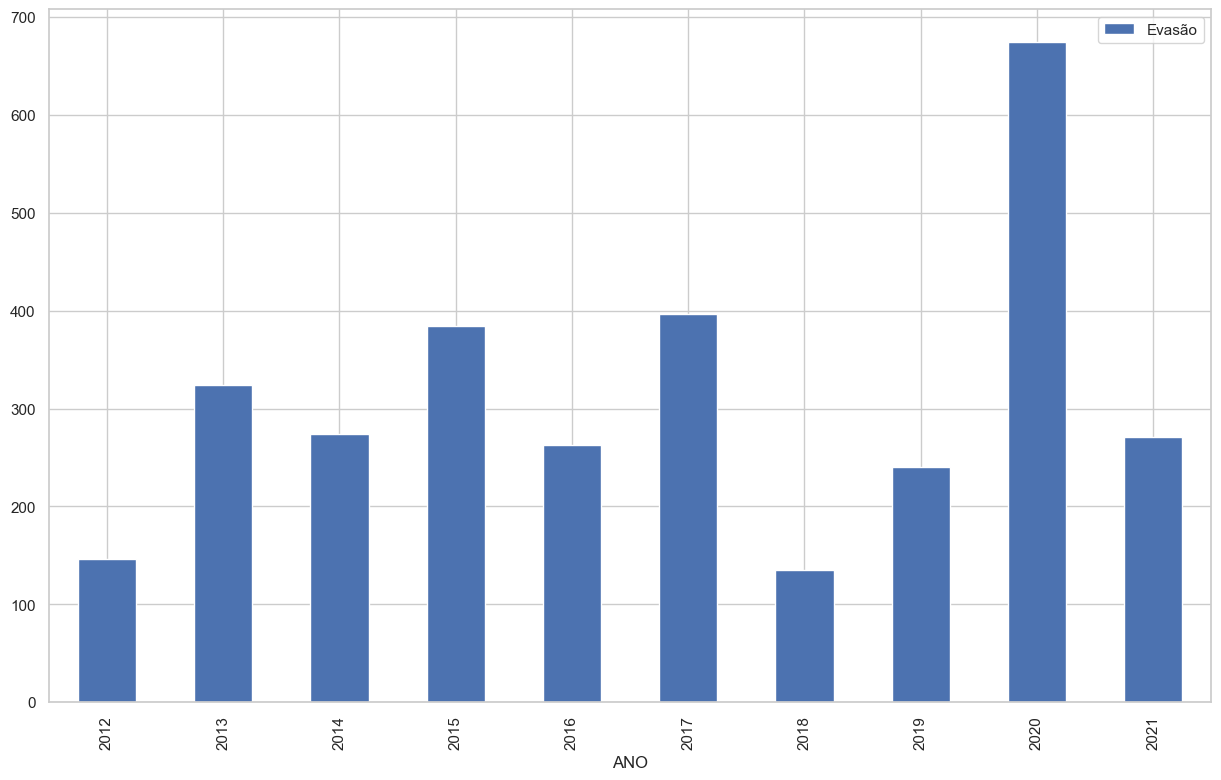

In [140]:
R_tb4=R4.reset_index()
plt.figure()
R_tb4.plot(kind='bar',x='ANO',y='Evasão',figsize=(15,9))

In [37]:
#como a região nordeste se saiu EAD
R5= df_geral.query('NO_REGIAO_IES=="Nordeste" & TP_MODALIDADE_ENSINO==2').groupby(['ANO','NO_REGIAO_IES']).\
    agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))

R5

,,QT_CONC,QT_ING_back,Evasão
ANO,NO_REGIAO_IES,,,
2011,Nordeste,205.0,1076.0,251.53
2012,Nordeste,196.0,2088.0,554.10
2013,Nordeste,254.0,2189.0,648.15
2014,Nordeste,532.0,2167.0,538.05
2015,Nordeste,606.0,2063.0,456.27
2016,Nordeste,792.0,2195.0,495.98
2017,Nordeste,306.0,2612.0,701.00
2018,Nordeste,633.0,2959.0,644.74
2019,Nordeste,207.0,2344.0,822.84


<AxesSubplot: xlabel='ANO'>

<Figure size 640x480 with 0 Axes>

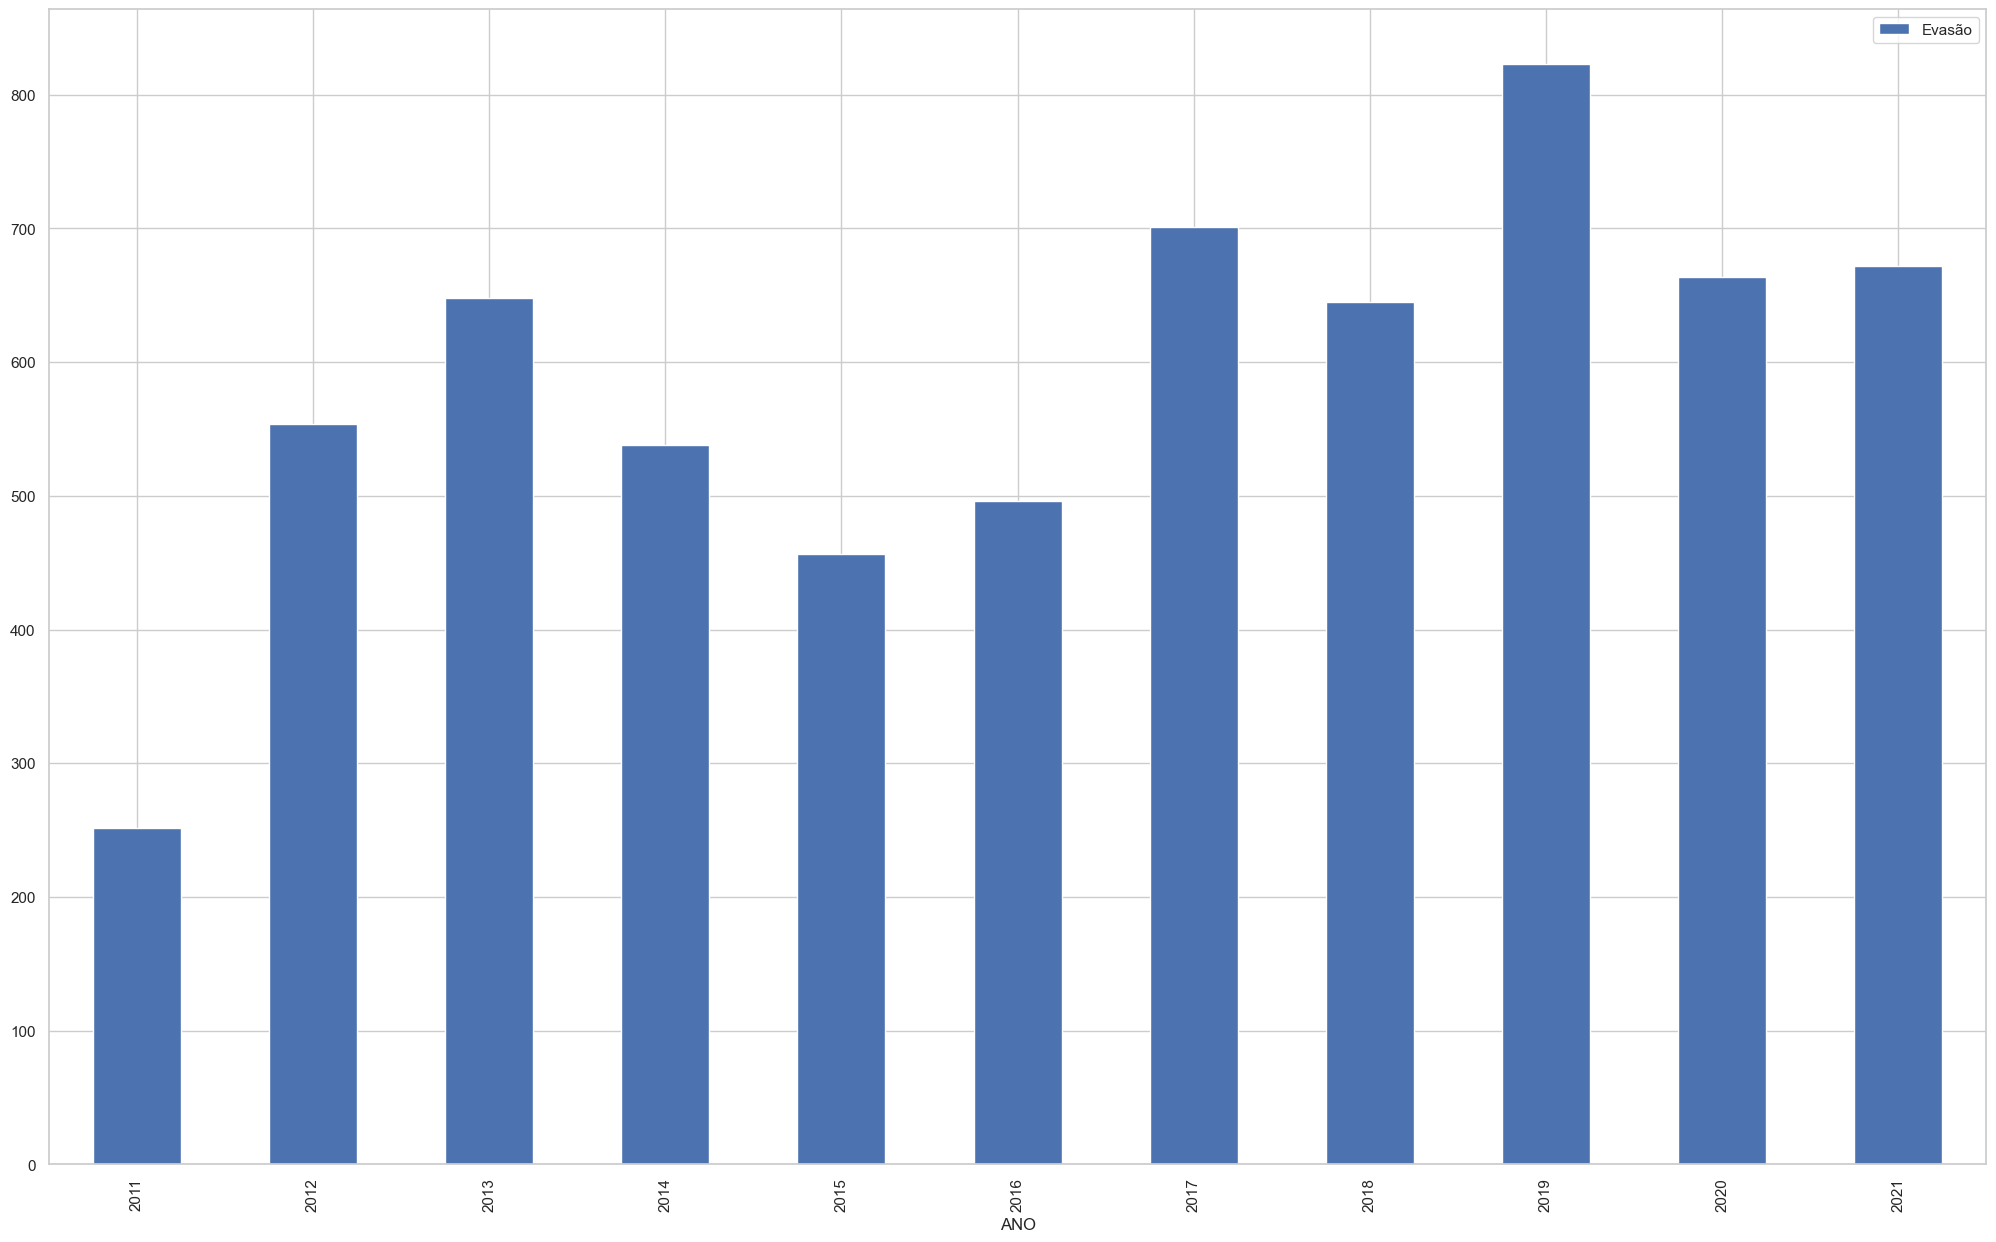

In [100]:
R_tb5=R5.reset_index()
plt.figure()
R_tb5.plot(kind='bar',x='ANO',y='Evasão',figsize=(25,15))

# evasao por ano e uf

In [103]:
#GERAL 
ev_gr_re=crosstab(index= df_geral['SG_UF_IES'],columns=df_geral['ANO'],values=df_geral['EVASAO'],aggfunc='sum')\
.fillna(value={2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0})
ev_gr_re

ANO,2015,2016,2017,2018,2019,2020,2021
SG_UF_IES,,,,,,,
AC,73.27,1.89,18.27,19.44,19.57,29.00,81.90
AL,60.10,77.92,137.17,91.71,77.45,84.75,109.33
AM,0.00,0.00,0.00,44.41,53.58,56.14,71.25
AP,57.41,9.09,0.00,0.00,60.00,44.10,83.20
BA,108.38,139.63,222.36,156.20,195.36,276.64,25.00
CE,58.72,98.56,141.64,93.98,93.81,124.59,83.33
DF,83.44,95.77,147.22,71.37,84.80,96.50,100.00
ES,70.06,106.78,181.05,0.00,90.68,100.00,100.00
GO,31.13,34.88,40.66,33.82,41.96,73.60,69.41


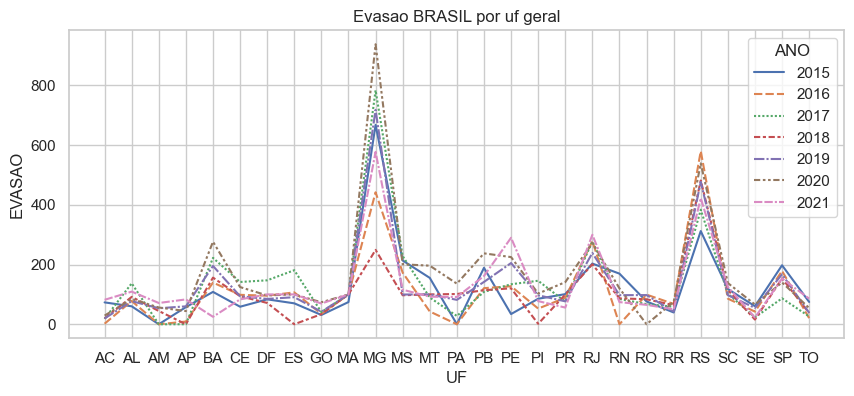

In [104]:
#grafico de linha 
plt.subplots(nrows=1, ncols=1, figsize = (10, 4))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_gr_re)
# Rotular 
plt.xlabel("UF")
plt.ylabel("EVASAO")
plt.title("Evasao BRASIL por uf geral")
#exibir
plt.show()

In [105]:
#EVASAO POR UF PRESENCIAL
df_geral_1=df_geral.query('TP_MODALIDADE_ENSINO==1')
ev_gr_re_1=crosstab(index= df_geral_1['SG_UF_IES'],columns=df_geral_1['ANO'],values=df_geral_1['EVASAO'],aggfunc='sum')\
.fillna(value={2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0})
ev_gr_re_1

ANO,2015,2016,2017,2018,2019,2020,2021
SG_UF_IES,,,,,,,
AC,73.27,1.89,18.27,19.44,19.57,29.00,81.90
AL,0.00,0.00,45.83,0.00,0.00,0.00,14.37
AM,0.00,0.00,0.00,44.41,53.58,56.14,71.25
AP,57.41,9.09,0.00,0.00,60.00,44.10,83.20
BA,108.38,139.63,122.36,56.20,95.36,176.64,25.00
CE,0.00,0.00,45.40,0.00,0.00,62.92,0.00
DF,0.00,0.00,51.88,0.00,0.00,0.00,0.00
ES,70.06,6.78,81.05,0.00,0.00,0.00,0.00
GO,31.13,34.88,40.66,33.82,41.96,73.60,69.41


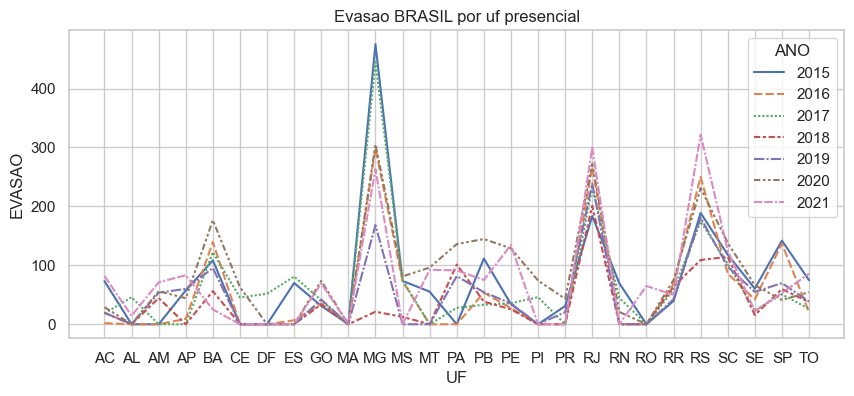

In [106]:
#grafico de linha 
plt.subplots(nrows=1, ncols=1, figsize = (10, 4))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_gr_re_1)
# Rotular 
plt.xlabel("UF")
plt.ylabel("EVASAO")
plt.title("Evasao BRASIL por uf presencial")
#exibir
plt.show()

In [43]:
#EVASAO EAD POR UF 
df_geral_2=df_geral.query('TP_MODALIDADE_ENSINO==2')
ev_gr_re_2=crosstab(index= df_geral_2['SG_UF_IES'],columns=df_geral_2['ANO'],values=df_geral_2['EVASAO'],aggfunc='sum')\
.fillna(value={2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0})
ev_gr_re_2

ANO,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SG_UF_IES,,,,,,,,,,,
AL,100.00,75.58,76.32,83.11,60.10,77.92,91.34,91.71,77.45,84.75,94.96
BA,NaN,NaN,0.00,0.00,0.00,0.00,100.00,100.00,100.00,100.00,0.00
CE,NaN,100.00,100.00,100.00,58.72,98.56,96.24,93.98,93.81,61.67,83.33
DF,100.00,99.64,96.09,72.84,83.44,95.77,95.34,71.37,84.80,96.50,100.00
ES,NaN,100.00,0.00,0.00,0.00,100.00,100.00,0.00,90.68,100.00,100.00
MA,NaN,100.00,100.00,100.00,74.39,99.60,100.00,100.00,100.00,100.00,100.00
MG,100.00,283.80,365.52,362.60,193.06,143.82,339.22,227.91,549.96,633.16,314.73
MS,90.10,0.00,169.26,196.43,140.00,99.66,153.50,84.59,99.60,119.76,115.70
MT,80.00,31.98,91.03,23.30,100.00,42.72,89.44,100.00,100.00,100.00,0.00


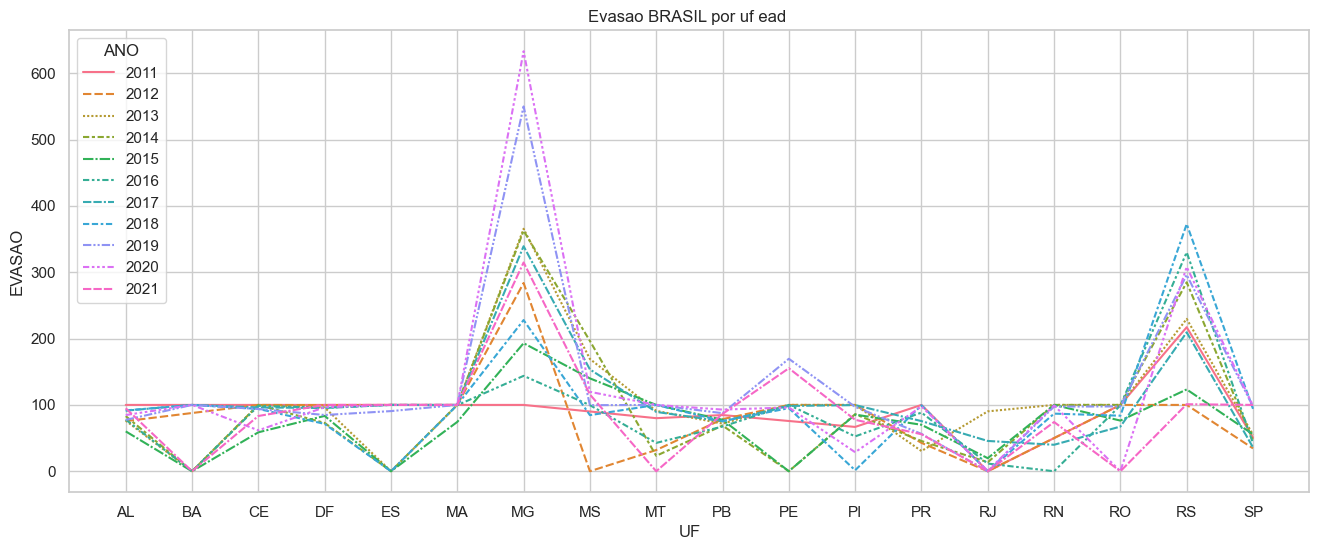

In [141]:
#grafico de linha 
plt.subplots(nrows=1, ncols=1, figsize = (16, 6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_gr_re_2)
# Rotular 
plt.xlabel("UF")
plt.ylabel("EVASAO")
plt.title("Evasao BRASIL por uf ead ")
#exibir
plt.show()

In [108]:
#EVASAO PRESENCIAL NORDESTE
df_geral_3=df_geral.query('TP_MODALIDADE_ENSINO==1 & NO_REGIAO_IES=="Nordeste"')
ev_gr_re_3=crosstab(index= df_geral_3['SG_UF_IES'],columns=df_geral_3['ANO'],values=df_geral_3['EVASAO'],aggfunc='sum')\
.fillna(value={2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0})
ev_gr_re_3

ANO,2015,2016,2017,2018,2019,2020,2021
SG_UF_IES,,,,,,,
AL,0.00,0.00,45.83,0.00,0.00,0.00,14.37
BA,108.38,139.63,122.36,56.20,95.36,176.64,25.00
CE,0.00,0.00,45.40,0.00,0.00,62.92,0.00
MA,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PB,111.50,53.62,33.12,38.41,54.30,144.62,75.18
PE,34.20,27.33,35.61,25.30,35.54,128.88,134.55
PI,0.00,0.00,46.02,0.00,0.00,74.22,0.00
RN,69.55,0.00,44.79,0.00,0.00,20.83,0.00
SE,60.49,42.24,23.12,15.66,54.84,66.18,22.40


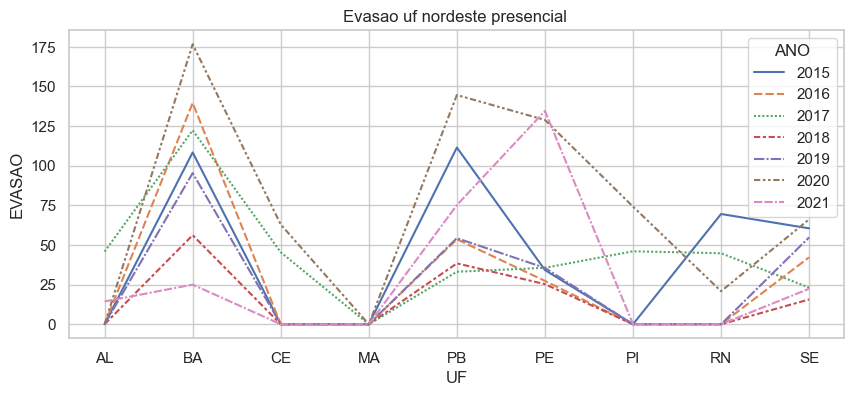

In [129]:
#grafico de linha 
plt.subplots(nrows=1, ncols=1, figsize = (10, 6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_gr_re_3)
# Rotular 
plt.xlabel("UF")
plt.ylabel("EVASAO")
plt.title("Evasao uf nordeste presencial ")
#exibir
plt.show()

In [110]:
#EVASAO NORDESTE EAD
df_geral_4=df_geral.query('TP_MODALIDADE_ENSINO==2 & NO_REGIAO_IES=="Nordeste"')
ev_gr_re_4=crosstab(index= df_geral_4['SG_UF_IES'],columns=df_geral_4['ANO'],values=df_geral_4['EVASAO'],aggfunc='sum')\
.fillna(value={2013:0,2014:0,2015:0,2016:0,2017:0,2018:0,2019:0,2020:0,2021:0})
ev_gr_re_4

ANO,2015,2016,2017,2018,2019,2020,2021
SG_UF_IES,,,,,,,
AL,60.10,77.92,91.34,91.71,77.45,84.75,94.96
BA,0.00,0.00,100.00,100.00,100.00,100.00,0.00
CE,58.72,98.56,96.24,93.98,93.81,61.67,83.33
MA,74.39,99.60,100.00,100.00,100.00,100.00,100.00
PB,77.66,67.36,75.32,75.60,87.53,92.94,86.42
PE,0.00,100.00,98.43,95.09,169.54,96.15,155.28
PI,85.40,52.54,99.75,1.50,97.08,28.70,77.53
RN,100.00,0.00,39.92,86.86,97.43,99.28,74.19


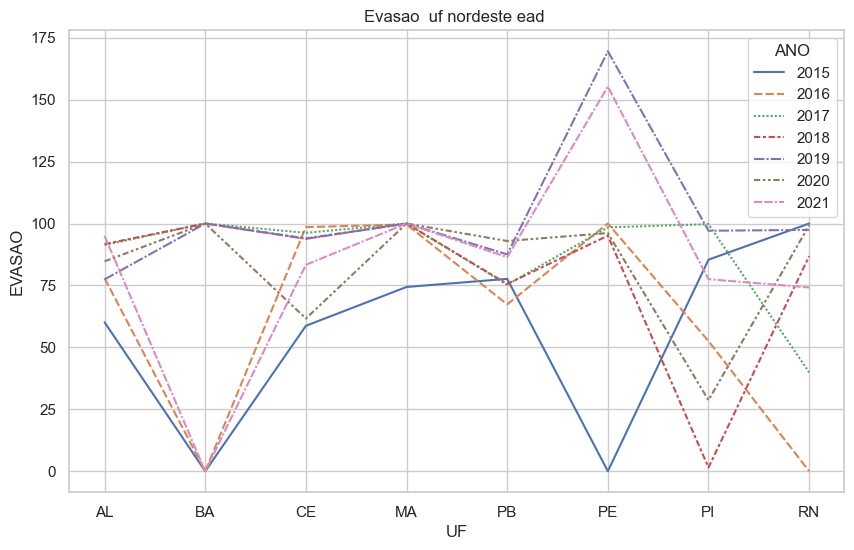

In [136]:
#grafico de linha 
plt.subplots(nrows=1, ncols=1, figsize = (10, 6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_gr_re_4)
# Rotular 
plt.xlabel("UF")
plt.ylabel("EVASAO")
plt.title("Evasao  uf nordeste ead ")
#exibir
plt.show()

In [121]:
#evasao PB presencial
ev_uf_pb= df_geral.query('SG_UF_IES=="PB" & TP_MODALIDADE_ENSINO==1').groupby(['ANO','NO_REGIAO_IES']).\
    agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_uf_pb

,,QT_CONC,QT_ING_back,Evasão
ANO,NO_REGIAO_IES,,,
2015,Nordeste,296.0,668.0,111.50
2016,Nordeste,404.0,512.0,53.62
2017,Nordeste,419.0,441.0,33.12
2018,Nordeste,378.0,227.0,38.41
2019,Nordeste,282.0,151.0,54.30
2020,Nordeste,110.0,430.0,144.62
2021,Nordeste,217.0,141.0,75.18


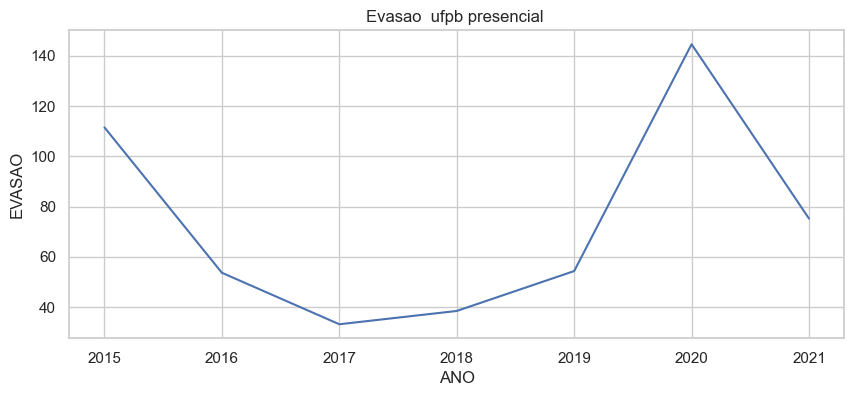

In [123]:
#grafico de linha
ev_uf_pb_tb=ev_uf_pb.reset_index() 
plt.subplots(nrows=1, ncols=1, figsize = (10, 4))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_uf_pb_tb, x='ANO', y='Evasão')
# Rotular 
plt.xlabel("ANO")
plt.ylabel("EVASAO")
plt.title("Evasao  ufpb presencial ")
#exibir
plt.show()

In [124]:
#evasao PB ead
ev_uf_pb_ed= df_geral.query('SG_UF_IES=="PB" & TP_MODALIDADE_ENSINO==2').groupby(['ANO','NO_REGIAO_IES']).\
    agg(QT_CONC=('QT_CONC', 'sum'), QT_ING_back=('QT_ING_back','sum'),Evasão=('EVASAO','sum'))
ev_uf_pb_ed

,,QT_CONC,QT_ING_back,Evasão
ANO,NO_REGIAO_IES,,,
2015,Nordeste,103.0,461.0,77.66
2016,Nordeste,142.0,435.0,67.36
2017,Nordeste,114.0,462.0,75.32
2018,Nordeste,112.0,459.0,75.60
2019,Nordeste,62.0,497.0,87.53
2020,Nordeste,31.0,439.0,92.94
2021,Nordeste,58.0,427.0,86.42


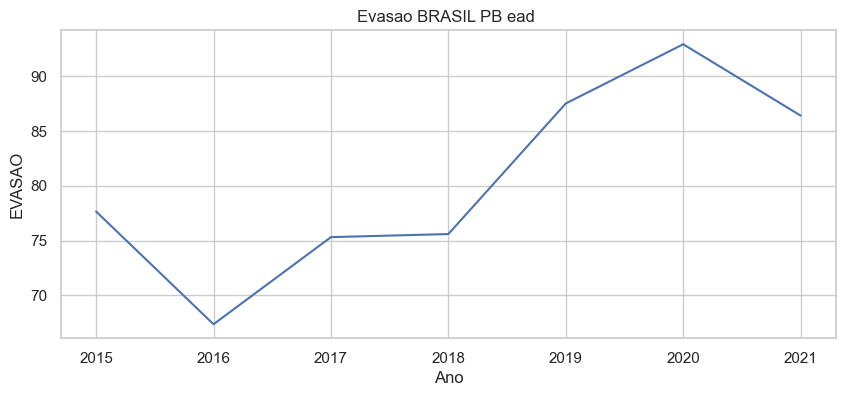

In [125]:
#grafico de linha
ev_uf_pb_ed_tb=ev_uf_pb_ed.reset_index() 
plt.subplots(nrows=1, ncols=1, figsize = (10, 4))
sns.set_theme(style='whitegrid')
sns.lineplot(data=ev_uf_pb_ed_tb, x='ANO', y='Evasão')
# Rotular 
plt.xlabel("Ano")
plt.ylabel("EVASAO")
plt.title("Evasao BRASIL PB ead ")
#exibir
plt.show()